In [1]:
import librosa
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
DATA_PATH="./Vowel_Data/Vowel/"
# DATA_PATH="./Word_Data/Word/"

n_MFCC=13
n_time_sample=33

In [3]:
def get_labels(path=DATA_PATH):
    labels=os.listdir(path)
    label_indices=np.arange(0,len(labels))
    return labels, label_indices, to_categorical(label_indices)

def speech2mfcc(file_path,max_len=n_time_sample):
    wave, sr= librosa.load(file_path, mono=True, sr=None)
    mfcc=librosa.feature.mfcc(wave,sr=sr,n_mfcc=n_MFCC)
    if (max_len > mfcc.shape[1]): #.shape[1], 1-->column
        pad_width=max_len-mfcc.shape[1]
        mfcc=np.pad(mfcc,pad_width=((0,0),(0,pad_width)),mode='constant')
    else:
        mfcc=mfcc[:,:max_len]
    return mfcc

def save_data_to_array(path=DATA_PATH, max_len=n_time_sample):
    labels,_,_=get_labels(path)

    for label in labels:
        mfcc_vectors=[]

        speechfiles=[path + label + '/' + speech for speech in os.listdir(path+'/'+label)]
        for speech in tqdm(speechfiles,"Saving vectors to label -'{}'".format(label)):
            mfcc=speech2mfcc(speech,max_len=max_len)
            mfcc_vectors.append(mfcc)
            
        np.save(label+'.npy',mfcc_vectors)
        
def get_train_test(split_ratio=0.8,random_state=42):
    labels,indices,_=get_labels(DATA_PATH)

    X=np.load(labels[0]+'.npy')
    y=np.zeros(X.shape[0])

    for i,label in enumerate(labels[1:]):
        x=np.load(label+'.npy')
        X=np.vstack((X,x))
        y=np.append(y,np.full(x.shape[0],fill_value=(i+1)))
    assert X.shape[0] == len(y)
    return train_test_split(X,y,test_size=(1-split_ratio),random_state=random_state,shuffle=True)

In [4]:
save_data_to_array()

Saving vectors to label -'vowel7': 100%|██████████| 40/40 [00:03<00:00, 10.16it/s]


In [4]:
X_train, X_test, y_train, y_test=get_train_test()
tot_no_MFCC=X_train.shape[1]*X_train.shape[2]
X_train=X_train.reshape((X_train.shape[0],tot_no_MFCC))
X_test=X_test.reshape(X_test.shape[0],tot_no_MFCC)
y_train_hot=to_categorical(y_train)
y_test_hot=to_categorical(y_test)

In [21]:
model=Sequential()
model.add(Dense(128, activation='tanh', input_shape=(tot_no_MFCC,)))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(7, activation='softmax'))
# opt = SGD(lr=0.001, momentum=0.1, decay=0.01)
# model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train_hot, epochs=50, batch_size=200, validation_data=(X_test,y_test_hot))

Train on 224 samples, validate on 56 samples
Epoch 1/50
224/224 [==============================] - 1s 2ms/step - loss: 2.0157 - acc: 0.1607 - val_loss: 1.8980 - val_acc: 0.2321
Epoch 2/50
224/224 [==============================] - 0s 80us/step - loss: 1.7369 - acc: 0.3170 - val_loss: 1.7940 - val_acc: 0.2679
Epoch 3/50
224/224 [==============================] - 0s 84us/step - loss: 1.6408 - acc: 0.4107 - val_loss: 1.6977 - val_acc: 0.3036
Epoch 4/50
224/224 [==============================] - 0s 66us/step - loss: 1.5887 - acc: 0.4732 - val_loss: 1.6203 - val_acc: 0.4107
Epoch 5/50
224/224 [==============================] - 0s 124us/step - loss: 1.5154 - acc: 0.5268 - val_loss: 1.5956 - val_acc: 0.4107
Epoch 6/50
224/224 [==============================] - 0s 205us/step - loss: 1.4833 - acc: 0.5402 - val_loss: 1.5912 - val_acc: 0.3750
Epoch 7/50
224/224 [==============================] - 0s 78us/step - loss: 1.4383 - acc: 0.5402 - val_loss: 1.5710 - val_acc: 0.3571
Epoch 8/50
224/224 [===

In [45]:
# model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.adadelta(),metrics=['accuracy'])
# history=model.fit(X_train,y_train_hot,batch_size=128,epochs=20,verbose=1,validation_data=(X_test,y_test_hot))
# history=model.fit(X_train,y_train_hot,batch_size=128,epochs=20,verbose=1)

Train on 224 samples, validate on 56 samples
Epoch 1/20
224/224 [==============================] - 1s 3ms/step - loss: 1.9554 - acc: 0.1830 - val_loss: 1.8643 - val_acc: 0.2143
Epoch 2/20
224/224 [==============================] - 0s 55us/step - loss: 1.7484 - acc: 0.3839 - val_loss: 1.6898 - val_acc: 0.3750
Epoch 3/20
224/224 [==============================] - 0s 125us/step - loss: 1.6229 - acc: 0.4062 - val_loss: 1.6228 - val_acc: 0.4107
Epoch 4/20
224/224 [==============================] - 0s 146us/step - loss: 1.5500 - acc: 0.4687 - val_loss: 1.5978 - val_acc: 0.4107
Epoch 5/20
224/224 [==============================] - 0s 80us/step - loss: 1.5013 - acc: 0.4375 - val_loss: 1.4975 - val_acc: 0.4107
Epoch 6/20
224/224 [==============================] - 0s 89us/step - loss: 1.4486 - acc: 0.4420 - val_loss: 1.5850 - val_acc: 0.3571
Epoch 7/20
224/224 [==============================] - 0s 111us/step - loss: 1.4479 - acc: 0.4152 - val_loss: 1.4517 - val_acc: 0.4821
Epoch 8/20
224/224 [==

In [27]:
# history_dict=history.history
# final_loss=history_dict['loss'][-1]
# final_acc=history_dict['acc'][-1]
# np.save('./Result/Training_trial7.npy',[final_loss, final_acc])
# np.load('./Result/Training_trial5.npy')

In [22]:
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)

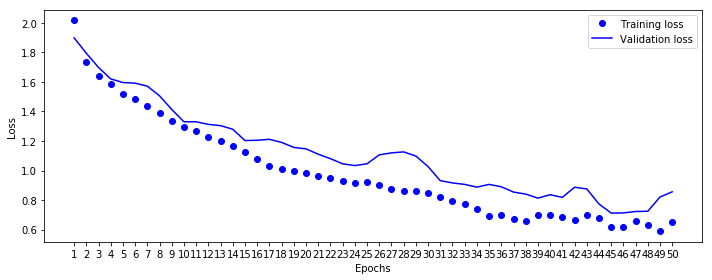

In [23]:
plt.figure(figsize=(10,4))
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('./Result/New_without_CNN/loss_vowel_128_64_32_16_tanh_softmax_adam_batch200.svg',format='svg', dpi=600)

In [24]:
plt.clf()
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']

<Figure size 432x288 with 0 Axes>

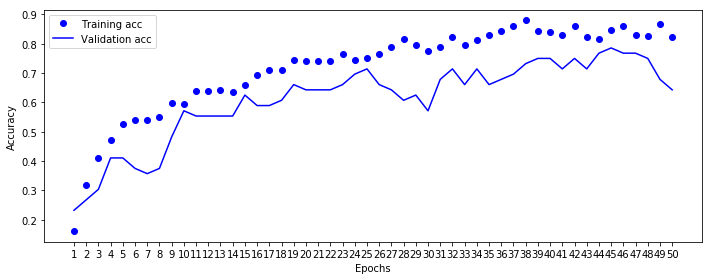

In [25]:
plt.figure(figsize=(10,4))
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.xticks(epochs)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('./Result/New_without_CNN/accuracy_vowel_128_64_32_16_tanh_softmax_adam_batch200.svg',format='svg', dpi=600)

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               58368     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 119       
Total params: 69,351
Trainable params: 69,351
Non-trainable params: 0
_________________________________________________________________
